### Similar_Celebrity
- 이미지의 임베딩 벡터 응용

#### Setting

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# !pip install face_recognition

In [3]:
import os 
import glob
# from glob import glob
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
import cv2 as cv
# import cmake
# import dlib
import face_recognition
from PIL import Image
import numpy as np


#### Path Setting
- 비교의 기준이 되는 이미지(김주택)는 base_celebrity & celebrity 폴더에 동시 저장
- 비교되는 이미지는 celebrity 폴더에 저장

In [4]:
# 일반으로 생성 
root_path = '/Users/js8456/google_drive/Colab_Notebook/aiffel_lms/E5_Similar_Celebrity'
# root_path = '/content/drive/MyDrive/Colab_Notebook/aiffel_lms/E5_Similar_Celebrity'
base_image_path = root_path + '/base_celebrity'
image_path = root_path + '/celebrity'

#### Image Extention Standardize
- 전체 이미지 확장자 변경 및 저장

In [5]:
# PNG to JPG then Save 
# Not Eliminating PNG, make duplicate image as JPG 

for path in glob.iglob(os.path.join(image_path, '*.png')):
  image = Image.open(path).convert('RGB')
  new_path = os.path.splitext(path)[0] + '.jpg'
  image.save(new_path)
  
for path in glob.iglob(os.path.join(base_image_path, '*.png')):
  image = Image.open(path).convert('RGB')
  new_path = os.path.splitext(path)[0] + '.jpg'
  image.save(new_path)

In [6]:
# JPEG to JPG then Save 
# Not Eliminating JPEG, make duplicate image as JPG 

for path in glob.iglob(os.path.join(image_path, '*.jpeg')):
  image = Image.open(path).convert('RGB')
  new_path = os.path.splitext(path)[0] + '.jpg'
  image.save(new_path)

for path in glob.iglob(os.path.join(base_image_path, '*.jpeg')):
  image = Image.open(path).convert('RGB')
  new_path = os.path.splitext(path)[0] + '.jpg'
  image.save(new_path)



- JPG 확장자 이미지만 list에 추가 -> 뒷부분에 추가 

In [7]:
print(base_image_path, image_path)

/Users/js8456/google_drive/Colab_Notebook/aiffel_lms/E5_Similar_Celebrity/base_celebrity /Users/js8456/google_drive/Colab_Notebook/aiffel_lms/E5_Similar_Celebrity/celebrity


In [8]:
# Right method for adding only JPG file

# base_image_path_list = [path for path in glob.glob(os.path.join(base_image_path, '*.jpg'))]
# image_path_list = [path for path in glob.glob(os.path.join(image_path, '*.jpg'))]

base_image_path_list = glob.glob(os.path.join(base_image_path, '*.jpg'))
image_path_list = glob.glob(os.path.join(image_path, '*.jpg'))

In [9]:
# Check
base_image_path_list
# image_path_list

['/Users/js8456/google_drive/Colab_Notebook/aiffel_lms/E5_Similar_Celebrity/base_celebrity/김주택.jpg',
 '/Users/js8456/google_drive/Colab_Notebook/aiffel_lms/E5_Similar_Celebrity/base_celebrity/김주택3.jpg',
 '/Users/js8456/google_drive/Colab_Notebook/aiffel_lms/E5_Similar_Celebrity/base_celebrity/김주택2.jpg']

In [10]:
# Image Data Size Check 

print(len(base_image_path_list))
print(len(image_path_list))

3
284


In [11]:
# check
os.listdir(base_image_path)

['김주택2.jpeg',
 '김주택3.jpeg',
 '김주택.jpg',
 '제목없는 폴더',
 '김주택3.jpg',
 '김주택2.jpg',
 '김주택.jpeg']

In [12]:
# Wrong method for adding only JPG file
# below lists are containing every extension files

# base_image_file_list = os.listdir(base_image_path)
# image_file_list = os.listdir(image_path)

# print ("base_image_file_list: {}".format(base_image_file_list))
# print ("image_file_list: {}".format(image_file_list))

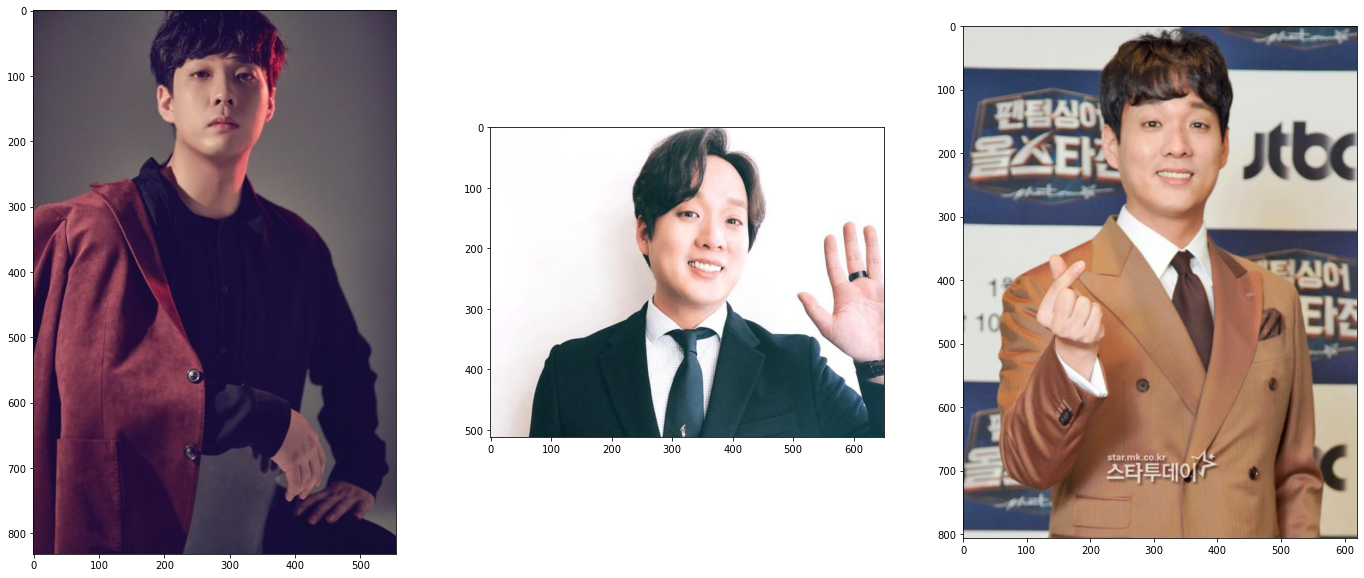

In [13]:

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (24, 10))

for i, ax in enumerate(axes.flatten()):
    image = img.imread(base_image_path_list[i])
    ax.imshow(image)
plt.show()

fig.tight_layout()



------------
-------------

### Facial_Recognition


#### Cropped Face Fuction

Data Check 
- 한개의 비교 이미지 face_recognition check 

[(82, 196, 211, 67)]


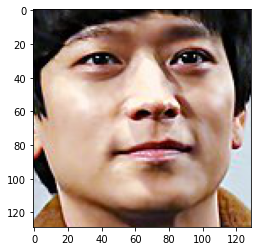

In [14]:
image_path_check = image_path + '/강동원.jpg'
image_check = face_recognition.load_image_file(image_path_check)
face_locations_check = face_recognition.face_locations(image_check)
print(face_locations_check)  # 이미지 내 얼굴 영역의 좌표를 출력

a, b, c, d = face_locations_check[0]
cropped_face_check = image_check[a:c,d:b,:]

plt.imshow(cropped_face_check)   # 이미지에서 얼굴영역만 잘라낸 cropped_face_check

* As Function


In [15]:
###get_cropped_face #1

def get_cropped_face(image_path):
    image = face_recognition.load_image_file(image_path)
    image_face_locations = face_recognition.face_locations(image)
    if image_face_locations:
        a, b, c, d = image_face_locations[0]
        cropped_face = image[a:c, d:b, :]
        return cropped_face

In [16]:
get_cropped_face(image_path_check)

array([[[ 19,  19,  29],
        [ 14,  13,  18],
        [ 29,  27,  28],
        ...,
        [ 16,  12,  13],
        [ 15,   9,  19],
        [ 21,  17,  31]],

       [[ 20,  20,  30],
        [ 18,  17,  22],
        [ 31,  31,  31],
        ...,
        [ 22,  20,  21],
        [ 15,  12,  19],
        [ 20,  17,  28]],

       [[ 18,  21,  30],
        [ 22,  21,  26],
        [ 35,  35,  37],
        ...,
        [ 27,  27,  25],
        [ 11,  10,  15],
        [ 14,  12,  23]],

       ...,

       [[154, 107,  61],
        [162, 111,  64],
        [159, 107,  60],
        ...,
        [159, 121,  59],
        [173, 131,  81],
        [193, 147, 111]],

       [[155, 107,  59],
        [169, 118,  71],
        [170, 118,  70],
        ...,
        [159, 120,  55],
        [169, 126,  73],
        [190, 143,  99]],

       [[164, 117,  65],
        [170, 120,  69],
        [170, 119,  66],
        ...,
        [141,  96,  29],
        [140,  94,  34],
        [152, 105,  53]]

#### Multiple Images Embedding Vector Function

Facial Embedding Vector Function using Cropped Face Image

In [17]:
# Facial Embedding Vector Function using Cropped Face Image

def get_face_embedding(face):
    return face_recognition.face_encodings(face)


In [18]:
# cropped_face_check 로 임베딩 벡터 확인 

get_face_embedding(cropped_face_check)

[array([-0.02917491,  0.11664847,  0.02454329,  0.00330233, -0.13348195,
        -0.07215091, -0.0585527 , -0.1197365 ,  0.11163109, -0.03618872,
         0.23028056,  0.01080346, -0.14548072, -0.13027172, -0.05786706,
         0.14733389, -0.10559827, -0.20446472, -0.01887479,  0.00763197,
         0.12768915,  0.04665032,  0.04064205,  0.016306  , -0.14324933,
        -0.28085807, -0.08915684, -0.09161796,  0.00878476, -0.07073541,
        -0.06793191,  0.0479129 , -0.24013431, -0.06851195,  0.07502392,
         0.08725791,  0.01661828, -0.06022016,  0.16848366,  0.03279807,
        -0.22535639,  0.06579961,  0.08646953,  0.25156763,  0.25930321,
         0.05817589,  0.03744281, -0.12383049,  0.08841465, -0.09141215,
         0.09438074,  0.1148873 ,  0.14894283,  0.04386103, -0.0258841 ,
        -0.15860431,  0.06140388,  0.07894517, -0.17876635, -0.0328737 ,
         0.09710941, -0.06157442, -0.03681332, -0.03437838,  0.25913608,
         0.0338825 , -0.05236165, -0.22287379,  0.1

Embedding Vector to Dictionary Data

In [20]:
# embedding vector -> dictionary : Function
# jpg 확장자만 취급 진행 
# work perfectly

def get_face_embedding_dict(image_path):
    image_file_name_list = os.listdir(image_path) 
    embedding_dict = {}

    for file in image_file_name_list:
        if file.endswith('.jpg'):
            image_file_path = os.path.join(image_path, file)
            face = get_cropped_face(image_file_path)
            if face is None: continue
            embedding = get_face_embedding(face)
            if not embedding: continue
            # if len(embedding) > 0:
            embedding_dict[file.split('.')[0]] = embedding[0]

    return embedding_dict


* Generate Embedding Vector Data 

In [21]:
base_image_embedding_vector = get_face_embedding_dict(base_image_path)
embedding_vector = get_face_embedding_dict(image_path)


In [22]:
#check 최종 이미지 개수 확인
print(len(base_image_embedding_vector), len(embedding_vector))

3 276


In [44]:
# check
base_image_embedding_vector

{'김주택': array([-0.03882396,  0.04540424,  0.05346895, -0.01348303, -0.09638649,
         0.02414951, -0.05140314, -0.14870963,  0.0965538 , -0.11070454,
         0.21016406, -0.03611045, -0.21151941, -0.14300612,  0.01593671,
         0.15603121, -0.0714744 , -0.17759185, -0.00203841,  0.0024854 ,
         0.06593528,  0.06029421, -0.01535907,  0.06266951, -0.09255551,
        -0.32385555, -0.1475545 , -0.08720969,  0.0243935 , -0.05461874,
        -0.16464679,  0.04909956, -0.16755348, -0.06235396,  0.07415148,
         0.10660148, -0.01434219, -0.03051014,  0.14571047,  0.00913272,
        -0.2084181 ,  0.05690121,  0.05910474,  0.26118046,  0.19095767,
         0.03541433,  0.02901023, -0.09880649,  0.12583837, -0.11637625,
         0.1261038 ,  0.1074613 ,  0.12386813,  0.09481438, -0.04221959,
        -0.19010858, -0.03539541,  0.13162082, -0.15501995,  0.09316023,
         0.07339597, -0.1683401 , -0.03536204, -0.05649988,  0.20143035,
         0.04957277, -0.1170891 , -0.2669746

#### Calculate Image Distance | L2
- 여기부터 base_image와 비교 image를 모두 갖고 있는 embedding_vector만 사용 

In [36]:
def get_base_distance(name1, name2):
    return np.linalg.norm(base_image_embedding_vector[name1] - base_image_embedding_vector[name2], ord=2)

def get_distance(name1, name2):
    return np.linalg.norm(embedding_vector[name1] - embedding_vector[name2], ord=2)

In [37]:
print(get_base_distance('김주택', '김주택2'), get_base_distance('김주택2', '김주택3'), get_base_distance('김주택3', '김주택'))

0.4670117010057332 0.3289705928925798 0.459369729255278


- 비교 이미지 3개간 distance 는 0.4670117010057332 0.3289705928925798 0.459369729255278 으로 나옴 

#### Extract Top5 Similar Images

#### Calculate Distance between 2 images

In [50]:
# name1과 name2의 거리를 비교하는 함수를 생성
# name1은 미리 지정하고, name2는 호출시에 인자로 받음

def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1


# get_sort_key_function()안에 name1을 미리 지정하고 이걸 sort_key_func에 함수로 넣은 뒤 
# name2를 sort_key_func에 넣으면 두 사이의 임베딩 벡터 거리가 나온다 

In [54]:
# name인자에 특정사람 이름 주면 그 사람과 가장 닮은 top 5 이미지와 거리 정보를 추출

def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_vector.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째는 자기 자신일 것이므로 제외
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

- embedding_vector 의 기반이 되는 파일들이 한글 폰트 인코딩 문제로 인해 정확히 인식되지 못함 
- 추후 해당 문제 해결을 통해 facial similar 한 인원들을 확인할 계획에 있음 